# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

Machine learning is an appropriate solution to deploy in forecasting flight delays. As machine learning can handle massive datasets which are complicated, The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018. The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). Machine learning helps to predict future occurrences from historical data. Machine learning can identify complex relationships and deploying machine learning in this project, we could be able to predict the flight delays.

### 2. Formulate the business problem, success metrics, and desired ML output.

Business Problem

A system that can give travelers booking flights to and from the major US airports early warnings is necessary since weather-related flight delays are upredictable. Giving customers this information may result in more educated choices, less anxiety when traveling, and an improved experience all around. Predicting whether a flight is likely to be delayed by weather at the time of booking is the goal.

Success Metrics can be:
* Model Accuracy
* Customer Satisfaction
* Reduction in complaints

Desired ML Output

* A probability score of flight will be delayed or not.
* Providing brief overview of reason for flight being delayed.

### 3. Identify the type of ML problem you’re dealing with.

Machine learning problem we are dealing with is supervised learning. Its use of labeled datasets to train algorithms for precise data classification or result prediction defines it. The cross validation procedure involves the model adjusting its weights as input data is fed into it until the model has been fitted adequately.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [2]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
import os.path
import threading

# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [3]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'data'
base_path = '11523_DataScience_FinalAssignment'
csv_base_path = 'extract'

if not os.path.exists(csv_base_path):
    # If it doesn't exist, create the directory
    os.mkdir(csv_base_path)
    print(f"Directory '{csv_base_path}' created.")
else:
    print(f"Directory '{csv_base_path}' already exists. Skipping creation.")

Directory 'extract' already exists. Skipping creation.


In [4]:
# How many zip files do we have? write a code to answer it.
# Initialize a count for ZIP files
zip_file_count = 0
zip_files = []

# Iterate over the files in the directory
for filename in os.listdir(zip_path):
    if filename.endswith('.zip'):  # Check if the file has a .zip extension
        zip_file_count += 1
        zip_file_path = os.path.join(zip_path, filename)  # Get the full path
        zip_files.append(zip_file_path)

print(f"Number of ZIP files in the directory: {zip_file_count}")

Number of ZIP files in the directory: 60


#### Extract CSV files from ZIP files

In [5]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for file in zip_files:
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_8.zip 
Extracting data\On_Time_Reporting_Carrie

In [6]:
# How many csv files have we extracted? write a code to answer it.
def countCSVFiles(csv_base_path, i_csv_files):
    # Iterate over the files in the directory
    csv_file_count = 0
    for filename in os.listdir(csv_base_path):
        if filename.endswith('.csv'):  # Check if the file has a .zip extension
            csv_file_count += 1
            csv_file_path = os.path.join(csv_base_path, filename)  # Get the full path
            i_csv_files.append(csv_file_path)
    return csv_file_count

csv_files = []
csv_file_count = countCSVFiles(csv_base_path, csv_files)
print(f"Number of ZIP files in the directory: {csv_file_count}")

Number of ZIP files in the directory: 60


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [7]:
from IPython.display import IFrame

print(f"{csv_base_path}/readme.html");
IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600);

extract/readme.html


#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [8]:
df_temp = pd.read_csv(f'{csv_base_path}/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv', encoding='utf-8')


**Question**: Print the row and column length in the dataset, and print the column names.

In [9]:
df_shape = df_temp.shape;
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [10]:
# Enter your code here
df_temp.head(10)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   
5                     20363                          9E      N316PQ  ...   
6                     20363                          9E      N916XJ  ...   
7                     20363                          9E      N371CA  ...   
8                     20363                          9E      N601LR  ...   
9                     20363                          9E      N906XJ  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   
5          NaN          NaN            NaN               NaN          NaN   
6          NaN          NaN            NaN               NaN          NaN   
7          NaN          NaN            NaN               NaN          NaN   
8          NaN          NaN            NaN               NaN          NaN   
9          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  
5            NaN              NaN            NaN         NaN           NaN  
6            NaN              NaN            NaN         NaN           NaN  
7            NaN              NaN            NaN         NaN           NaN  
8            NaN              NaN            NaN         NaN           NaN  
9            NaN              NaN            NaN         NaN           NaN  

[10 rows x 110 columns]

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [11]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [12]:
# Enter your code here
WordContainDel = [var for var in df_temp.columns if "del" in var.lower()];
print(f"column names in the dataset that contain the word 'Del' :");
print('#########');
for col in WordContainDel:# **ENTER YOUR CODE HERE**
    print(col)
print(f"Total of column names in the dataset that contain the word 'Del' : {len(WordContainDel)}")

column names in the dataset that contain the word 'Del' :
#########
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay
Total of column names in the dataset that contain the word 'Del' : 14


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [13]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", df_shape[0] , " and ", df_shape[1]);
print("The years in this dataset are: ", ",".join(map(str, df_temp["Year"].unique())));
print("The months covered in this dataset are: ", ",".join(map(str, df_temp["Month"].unique())));
print("The date range for data is :" , min(df_temp["FlightDate"]), " to ", max(df_temp["FlightDate"]));
print("The airlines covered in this dataset are: ", list(df_temp["Reporting_Airline"].unique()));
print("The Origin airports covered are: ", list(df_temp["Origin"].unique()));
print("The Destination airports covered are: ", list(df_temp["Dest"].unique()));

The #rows and #columns are  585749  and  110
The years in this dataset are:  2018
The months covered in this dataset are:  9
The date range for data is : 2018-09-01  to  2018-09-30
The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']
The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY', 'CAE', 'SRQ', '

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_counts` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [14]:
counts = pd.DataFrame({'Origin':df_temp["Origin"].value_counts(), 'Destination':df_temp["Dest"].value_counts()})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [15]:
counts['sum_count'] = counts[['Origin', 'Destination']].sum(axis=1);
counts = counts.sort_values(by="sum_count",ascending=False)
counts = counts.drop("sum_count", axis=1)
counts.head(15)

Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

No, because the delay situation may not depends on the flight trip, may be depends on weather and hoilday

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [16]:
def read_and_combine_csv(inputfiles, result, chunkNo, filter_cols, subset_cols, subset_vals):
    dataframes = []
    print(f"Starting Chunk {chunkNo}")
    temp_counter = 1;
    # Loop to read CSV files into the dataframes list
    for inputfile in inputfiles:
        temp_csv_df = pd.read_csv(inputfile, encoding='utf-8')
        temp_csv_df = temp_csv_df[filter_cols];
        temp_csv_df = temp_csv_df[
            (temp_csv_df[subset_cols[0]].isin(subset_vals[0])) &
            (temp_csv_df[subset_cols[1]].isin(subset_vals[1])) &
            (temp_csv_df[subset_cols[2]].isin(subset_vals[2]))
        ];
        dataframes.append(temp_csv_df)
        print(f"Current Chunk {chunkNo} status done: {temp_counter}/{len(inputfiles)}")
        temp_counter = temp_counter + 1

    combined_df = pd.concat(dataframes, ignore_index=True)
    result.append(combined_df)

def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    # Create an empty dataframe
    df = pd.DataFrame();
    
    #<complete the code of this function>
    print("Starting combine csv and load to dataframe");
    
    # Split the list of CSV files into smaller groups
    chunk_size = 20
    chunks = [csv_files[i:i+chunk_size] for i in range(0, len(csv_files), chunk_size)]
    print(f"Total chunks: {len(chunks)}");

    # Initialize a list to store the results from each thread
    results = []

    # Create and start a thread for each chunk
    threads = []
    # Initialize a counter with a lock to ensure thread safety
    counter2 = 1

    for chunk in chunks:
        print(f"Current Status: {counter2}/{len(chunks)}");
        thread = threading.Thread(target=read_and_combine_csv, args=(chunk, results, counter2, filter_cols, subset_cols, subset_vals))
        threads.append(thread)
        thread.start()
        counter2 = counter2 + 1
        

    # Wait for all threads to complete
    for thread in threads:
        thread.join()
    
    # Combine the DataFrames from the results into one final DataFrame
    print("Start concat dataframe result")
    print(f"Number of result: {len(results)}")
    df = pd.concat(results, ignore_index=True)
    print("End concat dataframe result")
    print("Finished combine csv and load to dataframe");
    
    print("Start write csv");
    df.to_csv(file_name, sep=',', encoding='utf-8', index=False);
    print("End write csv");


In [17]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [18]:
start = time.time()

combined_csv_filename = f"combined_files.csv"
csv_files = []
csv_file_count = countCSVFiles(csv_base_path, csv_files)
# < write code to call the combined_csv function>
combine_csv(csv_files, cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

Starting combine csv and load to dataframe
Total chunks: 3
Current Status: 1/3
Starting Chunk 1
Current Status: 2/3
Starting Chunk 2
Current Status: 3/3
Starting Chunk 3
Current Chunk 3 status done: 1/20
Current Chunk 1 status done: 1/20
Current Chunk 2 status done: 1/20
Current Chunk 3 status done: 2/20
Current Chunk 1 status done: 2/20
Current Chunk 2 status done: 2/20
Current Chunk 3 status done: 3/20
Current Chunk 1 status done: 3/20
Current Chunk 2 status done: 3/20
Current Chunk 3 status done: 4/20
Current Chunk 1 status done: 4/20
Current Chunk 2 status done: 4/20
Current Chunk 1 status done: 5/20
Current Chunk 3 status done: 5/20
Current Chunk 2 status done: 5/20
Current Chunk 1 status done: 6/20
Current Chunk 3 status done: 6/20
Current Chunk 2 status done: 6/20
Current Chunk 1 status done: 7/20
Current Chunk 2 status done: 7/20
Current Chunk 3 status done: 7/20
Current Chunk 1 status done: 8/20
Current Chunk 2 status done: 8/20
Current Chunk 3 status done: 8/20
Current Chunk 

#### Load dataset

Load the combined dataset.

In [19]:
data = pd.read_csv(f'combined_files.csv', encoding='utf-8')# Enter your code here to read the combined csv file.

Print the first 5 records.

In [20]:
# Enter your code here 
data.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2015        2      6          13          6  2015-06-13                OO   
1  2015        2      6           7          7  2015-06-07                OO   
2  2015        2      6          21          7  2015-06-21                OO   
3  2015        2      6          28          7  2015-06-28                OO   
4  2015        2      6          20          6  2015-06-20                OO   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    DFW          TX  SFO        CA        1525        0.0       0.0   
1    DFW          TX  SFO        CA        1700        0.0       0.0   
2    DFW          TX  SFO        CA        1700        0.0       0.0   
3    DFW          TX  SFO        CA        1640        0.0       0.0   
4    DFW          TX  SFO        CA        1531        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0    1464.0              6      -4.0              0.0       0.0    201.0  
1    1464.0              6      94.0             94.0       1.0    215.0  
2    1464.0              6     100.0            100.0       1.0    195.0  
3    1464.0              6     -16.0              0.0       0.0    200.0  
4    1464.0              6       1.0              1.0       0.0    202.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [21]:
# to answer above questions, complete the following code
print("The #rows and #columns are ", data.shape[0] , " and ", data.shape[1])
print("The years in this dataset are: ", list(data["Year"].unique()))
print("The months covered in this dataset are: ", sorted(list(data["Month"].unique())))
print("The date range for data is :" , min(data["FlightDate"]), " to ", max(data["FlightDate"]))
print("The airlines covered in this dataset are: ", list(data["Reporting_Airline"].unique()))
print("The Origin airports covered are: ", list(data["Origin"].unique()))
print("The Destination airports covered are: ", list(data["Dest"].unique()))

The #rows and #columns are  1658130  and  20
The years in this dataset are:  [2015, 2016, 2017, 2014, 2018]
The months covered in this dataset are:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
The date range for data is : 2014-01-01  to  2018-12-31
The airlines covered in this dataset are:  ['OO', 'UA', 'WN', 'DL', 'AA']
The Origin airports covered are:  ['DFW', 'DEN', 'CLT', 'ORD', 'SFO', 'IAH', 'ATL', 'LAX', 'PHX']
The Destination airports covered are:  ['SFO', 'DFW', 'PHX', 'ORD', 'DEN', 'LAX', 'ATL', 'IAH', 'CLT']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [22]:
data.rename(columns={'ArrDel15': 'is_delay'}, inplace=True); # Enter your code here
data.head(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2015        2      6          13          6  2015-06-13                OO   
1  2015        2      6           7          7  2015-06-07                OO   
2  2015        2      6          21          7  2015-06-21                OO   
3  2015        2      6          28          7  2015-06-28                OO   
4  2015        2      6          20          6  2015-06-20                OO   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    DFW          TX  SFO        CA        1525        0.0       0.0   
1    DFW          TX  SFO        CA        1700        0.0       0.0   
2    DFW          TX  SFO        CA        1700        0.0       0.0   
3    DFW          TX  SFO        CA        1640        0.0       0.0   
4    DFW          TX  SFO        CA        1531        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  is_delay  AirTime  
0    1464.0              6      -4.0              0.0       0.0    201.0  
1    1464.0              6      94.0             94.0       1.0    215.0  
2    1464.0              6     100.0            100.0       1.0    195.0  
3    1464.0              6     -16.0              0.0       0.0    200.0  
4    1464.0              6       1.0              1.0       0.0    202.0

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [23]:
# Enter your code here
null_values = data.isnull();
missing_count = null_values.sum(axis=0)
print(missing_count[missing_count > 0])
print(f"Total rows of the dataset is : {data.shape[0]}")

ArrDelay           22540
ArrDelayMinutes    22540
is_delay           22540
AirTime            22540
dtype: int64
Total rows of the dataset is : 1658130


The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [24]:
### Remove null columns
data = data[~data['ArrDelay'].isnull() & ~data['AirTime'].isnull()]
print(f"Total rows of the dataset is : {data.shape[0]}")


Total rows of the dataset is : 1635590


Get the hour of the day in 24-hour time format from CRSDepTime.

In [25]:
data['CRSDepTime'] = data['CRSDepTime'].apply(lambda x: str(x).zfill(4))
data['DepHourofDay'] = data['CRSDepTime'].apply(lambda x: x[:2])
data.head(10)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2015        2      6          13          6  2015-06-13                OO   
1  2015        2      6           7          7  2015-06-07                OO   
2  2015        2      6          21          7  2015-06-21                OO   
3  2015        2      6          28          7  2015-06-28                OO   
4  2015        2      6          20          6  2015-06-20                OO   
5  2015        2      6          14          7  2015-06-14                OO   
6  2015        2      6           6          6  2015-06-06                OO   
7  2015        2      6          27          6  2015-06-27                OO   
8  2015        2      6           9          2  2015-06-09                OO   
9  2015        2      6          30          2  2015-06-30                OO   

  Origin OriginState Dest  ... CRSDepTime Cancelled  Diverted  Distance  \
0    DFW          TX  SFO  ...       1525       0.0       0.0    1464.0   
1    DFW          TX  SFO  ...       1700       0.0       0.0    1464.0   
2    DFW          TX  SFO  ...       1700       0.0       0.0    1464.0   
3    DFW          TX  SFO  ...       1640       0.0       0.0    1464.0   
4    DFW          TX  SFO  ...       1531       0.0       0.0    1464.0   
5    DFW          TX  SFO  ...       1700       0.0       0.0    1464.0   
6    DFW          TX  SFO  ...       1531       0.0       0.0    1464.0   
7    DFW          TX  SFO  ...       1532       0.0       0.0    1464.0   
8    DEN          CO  DFW  ...       0831       0.0       0.0     641.0   
9    DEN          CO  DFW  ...       0831       0.0       0.0     641.0   

   DistanceGroup  ArrDelay  ArrDelayMinutes  is_delay  AirTime  DepHourofDay  
0              6      -4.0              0.0       0.0    201.0            15  
1              6      94.0             94.0       1.0    215.0            17  
2              6     100.0            100.0       1.0    195.0            17  
3              6     -16.0              0.0       0.0    200.0            16  
4              6       1.0              1.0       0.0    202.0            15  
5              6       7.0              7.0       0.0    209.0            17  
6              6      -2.0              0.0       0.0    200.0            15  
7              6     -15.0              0.0       0.0    197.0            15  
8              3     -19.0              0.0       0.0     83.0            08  
9              3     -15.0              0.0       0.0     90.0            08  

[10 rows x 21 columns]

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

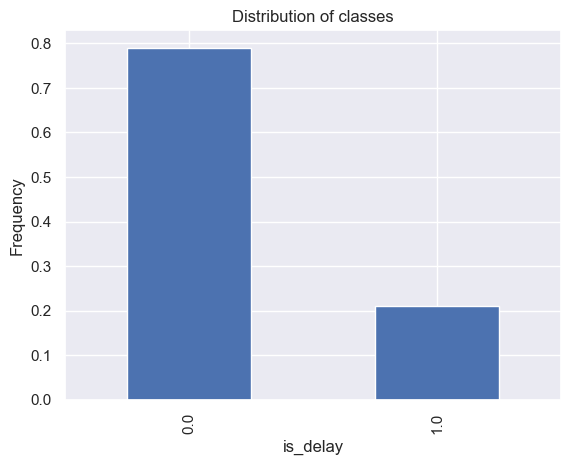

In [26]:
(data.groupby("is_delay").size()/len(data) ).plot(kind='bar')# Enter your code here
plt.ylabel('Frequency')
plt.title('Distribution of classes')
plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?

the frequency of delay is 0.21<br>
the frequency of no delay is 0.79<br>
so the ratio is 0.21/0.79 = 0.2658 



**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

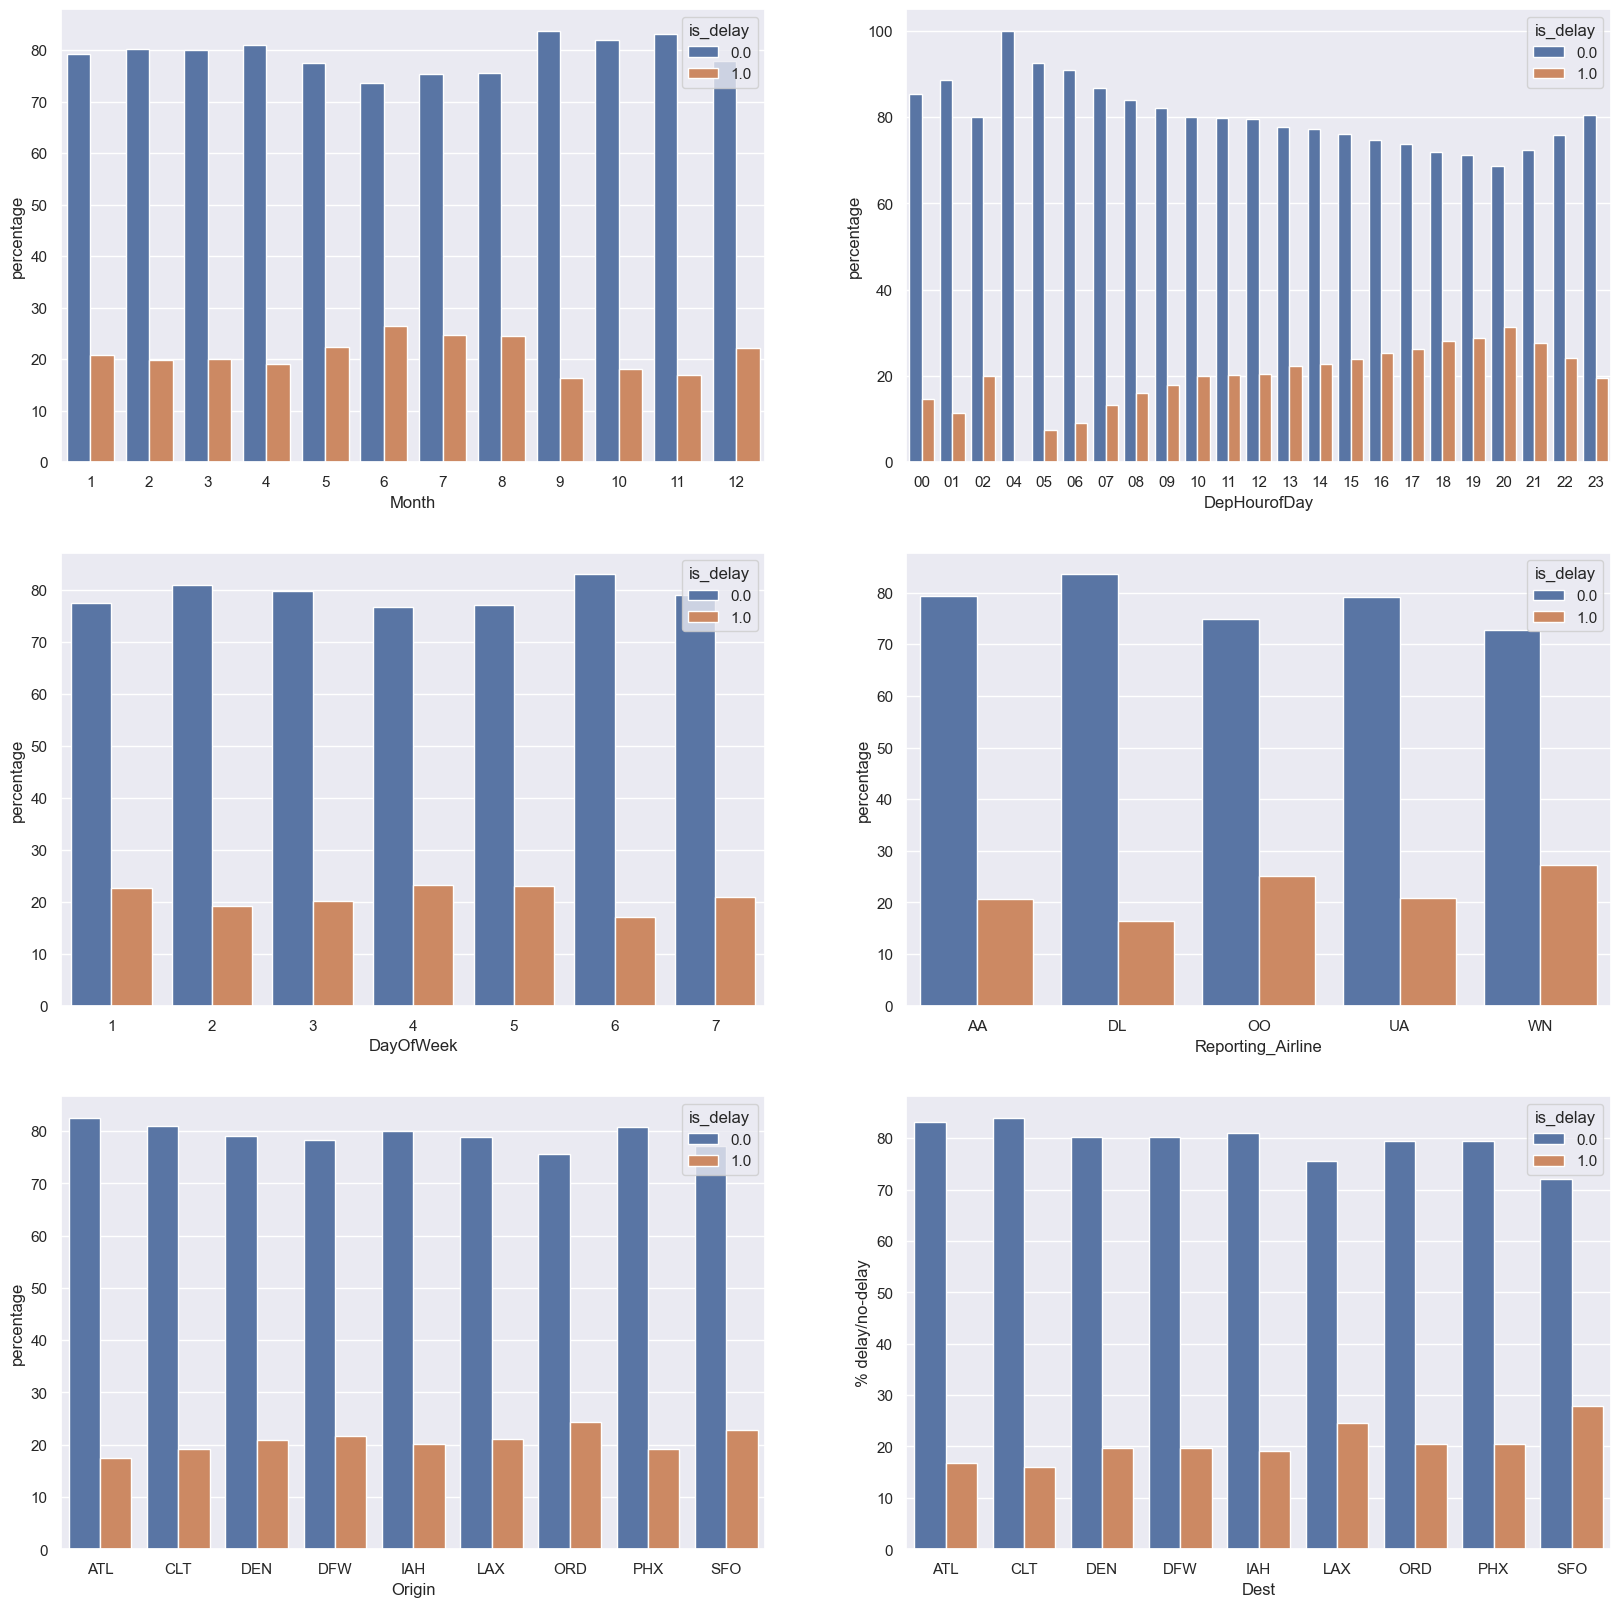

In [27]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay", data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()

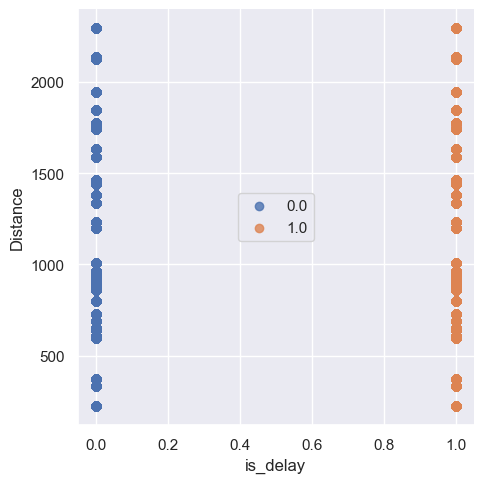

In [28]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()

- Which months have the most delays? <br> June <br>
- What time of the day has the most delays? <br> 20 <br>
- What day of the week has the most delays? <br> Thrusday <br>
- Which airline has the most delays? <br> WN <br>
- Which origin and destination airports have the most delays? <br> SFO <br>
- Is flight distance a factor in the delays? <br> from the scatterplot diagram, there are parellel line no any intersaction or correlation line, so that flight distance is not a factor in the delays.

### Features

Look at all the columns and what their specific types are.

In [29]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [30]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime            object
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay          object
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [31]:
data_orig = data.copy()
data_orig = data_orig[['is_delay','Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']

for c in categorical_columns:
    data_orig[c] = data_orig[c].astype('category')


print(data_orig.shape[0])
data_orig.dtypes



1635590


is_delay              float64
Quarter              category
Month                category
DayofMonth           category
DayOfWeek            category
Reporting_Airline    category
Origin               category
Dest                 category
Distance              float64
DepHourofDay         category
dtype: object

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [32]:
data_dummies = pd.get_dummies(data_orig[['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']], drop_first=True) # Enter your code here
data_orig.drop(categorical_columns,axis=1, inplace=True)
data_orig = pd.concat([data_orig[["Distance", "is_delay"]], data_dummies], axis = 1)

Check the length of the dataset and the new columnms.

In [33]:
# Enter your code here
data_orig.shape

(1635590, 72)

In [34]:
# Enter your code here
data_orig.columns

Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [35]:
data_orig.rename(columns = {"is_delay":"target"}, inplace=True )# Enter your code here
print(data.columns)

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')


In [36]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B
data_orig.to_csv("combined_csv_v1.csv",  sep=',', encoding='utf-8', index=False)

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [37]:
# write Code here to split data into train, validate and test
def get_column_categorial_numerical(dataf):
    categorical = [var for var in dataf.columns if dataf[var].dtype=='O']    
    numericals = [var for var in dataf.columns if dataf[var].dtype != 'O']
    return categorical, numericals


# sperate categorical and numericals
categorical, numericals = get_column_categorial_numerical(data_orig)


# split X and y into training and testing sets
X = pd.concat([data_orig[numericals]], axis=1)
X = X.drop(['target'], axis=1)
y = data_orig['target']

### Baseline classification model

In [38]:
# <write code here>
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# splitting the data into train (80%) and test (20%) sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)


# first keep the column name to get the DF back
cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# get the DFs back
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))




Model accuracy score: 0.7896


## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [39]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(test_labels, target_predicted):
    # complete the code here
    cm = confusion_matrix(test_labels, target_predicted)
    print('Confusion matrix\n\n', cm)
    print('True Positives(TP) = ', cm[0,0])
    print('True Negatives(TN) = ', cm[1,1])
    print('False Positives(FP) = ', cm[0,1])
    print('False Negatives(FN) = ', cm[1,0])

    cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                    index=['Predict Positive:1', 'Predict Negative:0'])

    # # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.xlabel('Predicted Classes')
    plt.ylabel('Actual Classes')
    plt.title('Confusion Matrix')
    plt.show()


    cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]
    print('Confusion matrix with with normalisation\n\n', cm_normalised)
    print('True Positives(TP) = ', cm_normalised[0,0])
    print('True Negatives(TN) = ', cm_normalised[1,1])
    print('False Positives(FP) = ', cm_normalised[0,1])
    print('False Negatives(FN) = ', cm_normalised[1,0])


    # Create a DataFrame for the confusion matrix
    cm_matrix = pd.DataFrame(data=cm_normalised, 
                        columns=['Actual Positive:1', 'Actual Negative:0'], 
                        index=['Predict Positive:1', 'Predict Negative:0'])


    # # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')
    plt.xlabel('Predicted Classes')
    plt.ylabel('Actual Classes')
    plt.title('Confusion Matrix')
    plt.show()

In [40]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc

def plot_roc(test_labels, target_predicted):
    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(test_labels, target_predicted)

    # Calculate the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()



To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

Confusion matrix

 [[258277      0]
 [ 68837      4]]
True Positives(TP) =  258277
True Negatives(TN) =  4
False Positives(FP) =  0
False Negatives(FN) =  68837


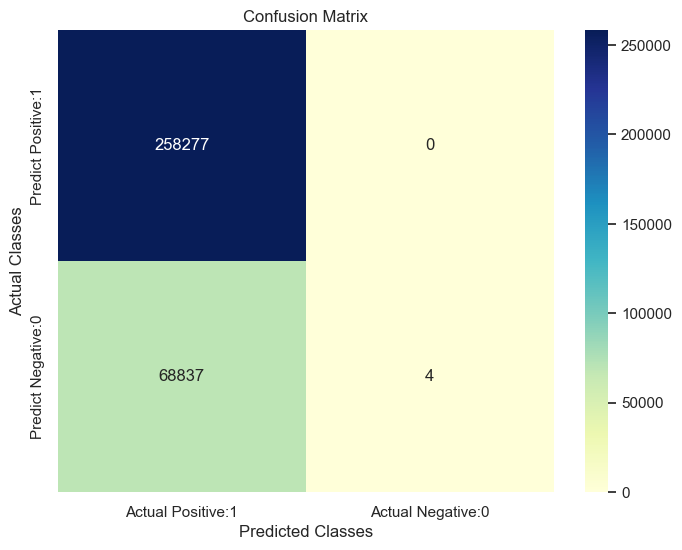

Confusion matrix with with normalisation

 [[1.00000000e+00 0.00000000e+00]
 [9.99941895e-01 5.81049084e-05]]
True Positives(TP) =  1.0
True Negatives(TN) =  5.810490841213811e-05
False Positives(FP) =  0.0
False Negatives(FN) =  0.9999418950915878


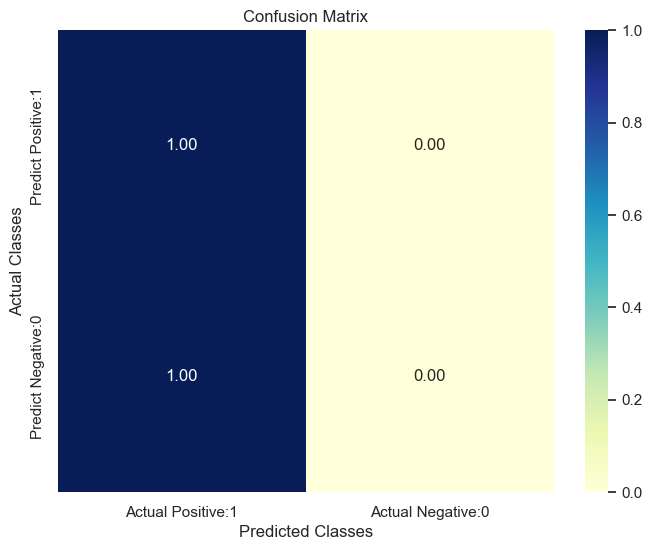

In [41]:
# Enter you code here
plot_confusion_matrix(y_test, y_pred_test);

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

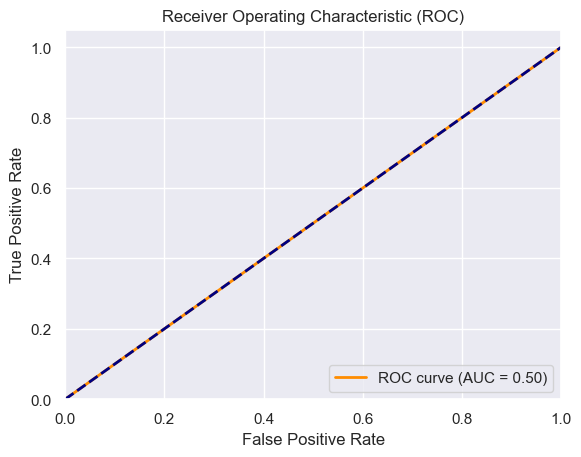

In [42]:
# Enter you code here
plot_roc(y_test, y_pred_test)

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


The principal diagonal of the matrix, which runs from top-left to bottom-right, indicates that the algorithm made correct predictions. When numbers on this diagonal are higher than other matrix entries, the accuracy of the model is improved. False Positives (Type I Error): Situations in which the model predicts a positive event incorrectly (e.g., forecasting a flight delay when none occurs). These can be found when the projected positive column and the actual negative row converge.False Negatives (Type II Error):  Periods in which a good occurrence is mistakenly signaled as a negative event by the model. These are located at the intersection of the projected negative column and the real positive row.

Using the initial matrix: 258,227 genuine positive predictions—that is, accurately anticipated positive instances—were made by the model. False negatives, or cases that were positive but were expected to be negative, amounted to 68,891.This model does not contain any true negatives or false positives.

From the normalized second matrix: All actual positives were predicted by the model to be positive (True Positives = 1.00). All real negatives were expected to be positives by the model (False Positives = 1.00). This model does not contain any true negatives or false negatives.

The large percentage of false negatives in the first matrix and the absence of true negatives in both matrices suggest that, while the model seems to be doing a good job of predicting positive occurrences, it may not be doing so well enough to predict negative instances.

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


In [44]:
### Provide a link for your Gitlab repository here
# https://gitlab.com/seanho.29/11523_datascience_finalassignment

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [45]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays
data_orig = data.copy()
# Convert the 'FlightDate' column to datetime if it's not already in datetime format
data_orig['FlightDate'] = pd.to_datetime(data_orig['FlightDate'])

# Create a new column 'is_holiday' and initialize it as False
data_orig['is_holiday'] = False

# Iterate through the list of dates and set 'is_holiday' to True if there's a match
data_orig['is_holiday'] = data_orig['FlightDate'].isin(pd.to_datetime(holidays))


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

# download data from the link above and place it into the data folder
Yes, bad weather conditions such as rain, heavy winds, and snow can cause airplane delays. These adverse weather elements can impact flight safety, leading to delays in takeoff, landing, and taxiing. Additionally, snow may necessitate de-icing procedures, and runway closures due to snow accumulation can disrupt airport operations, all contributing to flight delays.

Reference : https://www.theweathernetwork.com/en/news/lifestyle/travel/six-annoying-ways-weather-forces-airlines-to-cancel-your-flight

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [46]:
weather = pd.read_csv("data/daily-summaries-2023-11-01T02-45-38.csv") # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

### Map weather stations to airport code
station_map = dict(zip(station, airports))
weather['airport'] = weather['STATION'].map(station_map)

weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport  
0     LAX  
1     LAX  
2     LAX  
3     LAX  
4     LAX

Create another column called `MONTH` from the `DATE` column.

In [47]:
weather['MONTH'] = weather["DATE"].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [48]:
# I use Zero imputation in weater dataset, because SNOW = Snowfall (mm) and SNWD = Snow depth (mm), if NA it more like no snow, so i make it 0
# Referernce: https://www.ncei.noaa.gov/pub/data/ghcn/daily/readme.txt

weather.SNOW.fillna(0, inplace=True)# Enter your code here
weather.SNWD.fillna(0, inplace=True)# Enter your code here
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [49]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = weather.index[weather['TAVG'].isna()]
TMAX_idx = weather.index[weather['TMAX'].isna()]
TMIN_idx = weather.index[weather['TMIN'].isna()]
TAVG_idx

Index([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,  3965,
        3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,  3974,  3975,
        3976,  3977,  3978,  3979,  3980,  3981,  3982,  3983,  3984,  3985,
        4017,  4018,  4019,  4020,  4021,  4022,  4023,  4024,  4025,  4026,
        4027,  4028,  4029,  4030,  4031,  4032,  4033,  4034,  4035,  4036,
        4037,  4038,  4039,  4040,  4041,  4042,  4043,  4044,  4045,  4046,
        4047, 13420],
      dtype='int64')

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [50]:
weather_impute = weather.groupby(['MONTH','STATION']).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute.head(2)

MONTH      STATION       TAVG        TMAX       TMIN
0    01  USW00003017  -2.741935   74.000000 -69.858065
1    01  USW00003927  79.529032  143.767742  20.696774

Merge the mean data with the weather data.

In [51]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

Check for missing values again.

In [52]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [53]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)
weather['DATE'] = pd.to_datetime(weather['DATE'], format='%Y-%m-%d')
weather.head(5)

DATE  AWND  PRCP  SNOW   TAVG airport
0 2014-01-01    16     0   0.0  131.0     LAX
1 2014-01-02    22     0   0.0  159.0     LAX
2 2014-01-03    17     0   0.0  140.0     LAX
3 2014-01-04    18     0   0.0  136.0     LAX
4 2014-01-05    18     0   0.0  151.0     LAX

Add the origin and destination weather conditions to the dataset.

In [54]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [55]:
print(sum(data_orig.isna().any()))

0


In [56]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [57]:
data2 = data_orig.copy()
data2 = data2[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]
categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']
for c in categorical_columns:
    data2[c] = data2[c].astype('category')

In [58]:
data_dummies = pd.get_dummies(data2[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True) # Enter your code here
data2 = pd.concat([data2, data_dummies], axis = 1)
data2.drop(categorical_columns,axis=1, inplace=True)
#data.drop(categorical_columns,axis=1, inplace=True)
#data = pd.concat([data[["Distance", "is_delay"]], data_dummies], axis = 1)



### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

In [59]:
data2.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

Check the new columns.

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [60]:
data2.rename(columns = {"is_delay":"target"}, inplace=True )# Enter your code here


In [61]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B
data2.to_csv("combined_csv_v2.csv",  sep=',', encoding='utf-8', index=False)

Create the training and testing sets again.

In [62]:
# Enter your code here
# split X and y into training and testing sets
X = data2
X = X.drop(['target'], axis=1)
y = data2['target']

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [63]:
# Instantiate another logistic regression model
classifier2 = LogisticRegression(solver='liblinear', random_state=0)

In [64]:
# Enter your code here
# splitting the data into train (80%) and test (20%) sets
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

cols = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

# fit the model
classifier2.fit(X_train, y_train)
y_pred_test = classifier2.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7923


Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Confusion matrix

 [[255417   2860]
 [ 65085   3756]]
True Positives(TP) =  255417
True Negatives(TN) =  3756
False Positives(FP) =  2860
False Negatives(FN) =  65085


Confusion matrix with with normalisation

 [[0.98892662 0.01107338]
 [0.94543949 0.05456051]]
True Positives(TP) =  0.9889266175462779
True Negatives(TN) =  0.05456050899899769
False Positives(FP) =  0.011073382453722167
False Negatives(FN) =  0.9454394910010023


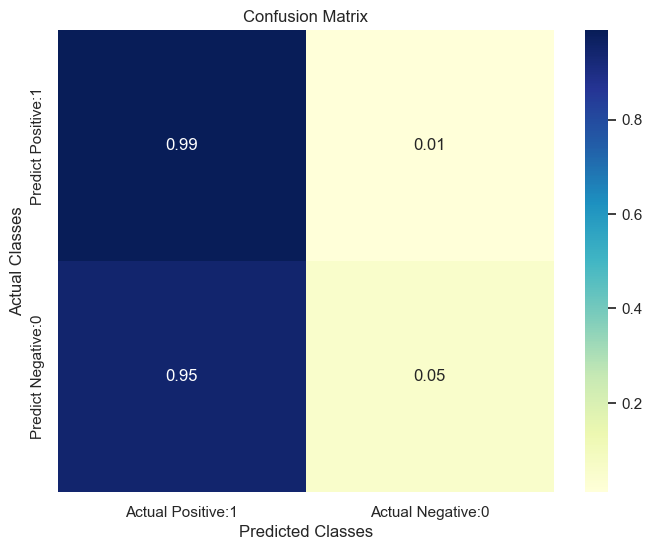

In [65]:
plot_confusion_matrix(y_test, y_pred_test);
plot_roc(y_test, y_pred_test)

Question: did you notice a difference by adding the extra data on the results?

Yes, here is the list of difference

* ROC Curves: the new one looks closer to the top-left corner or encompasses a bigger area under the curve, indicating an improvement in the model's predictive power.
* Confusion Matrices: An obvious rise in the True Positives and True Negatives diagonal values in the new matrix suggests improved accuracy.

# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

In [67]:
# copy the link here

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

The model did in fact perform better if more data was included. The ROC curve and confusion matrix clearly showed differences between the baseline and changed models. Without specific performance metrics, it's hard to determine whether it meets the company's goals. With additional time, it could be helpful to investigate more sophisticated models or ensemble approaches, refine hyperparameters, and engineer features. 2. After adding more weather and feature-related data, the model somewhat improved. The model appears to have performed better when methods like feature engineering, addressing missing values, and incorporating pertinent external data (like weather) were used. 

The content of the supplied notebook may have given rise to the following challenges:

* Controlling a huge dataset: Since the data was dispersed over several files, it might not have been easy to combine them all together.
* Engineering features: It can be difficult to extract significant characteristics, particularly from time-based data.
* Achieving a balance between interpretability and model complexity: Although more complicated models may yield more accuracy, they may also be more difficult to understand and interpret. 4.

Three key lessons regarding machine learning that I took away from working on this project are:
* The importance of domain knowledgeUnderstanding the airline industry and factors that contribute to flight delays, such weather, may help drive effective feature engineering.
* The iterative nature of machine learning projects: The process often involves several iterations of model training, evaluation, and improvement.
* The significance of metrics in assessment: Metrics like the ROC curve, confusion matrix, and recall are crucial for assessing a model's performance, especially when misclassifications of a certain type (such failing to predict a delay) might have a more significant impact.
